In [1]:
### Keras and Tensorflow >2.0
### Data Collection
import pandas_datareader as pdr


In [2]:
key="c8ffbc65562269c35e98f1554729edb5fc5b7f65"
df = pdr.get_data_tiingo('AAPL', api_key=key)
df.to_csv('AAPL.csv')

C:\Users\Vishav Garg\anaconda3\lib\site-packages\pandas_datareader\tiingo.py:234: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  return pd.concat(dfs, self._concat_axis)


In [3]:
df.to_csv('AAPL.csv')
import pandas as pd
df=pd.read_csv('AAPL.csv')
df.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,AAPL,2018-04-02 00:00:00+00:00,166.68,168.94,164.47,166.64,37586791,39.671106,40.209003,39.145109,39.661585,150347164,0.0,1.0
1,AAPL,2018-04-03 00:00:00+00:00,168.39,168.75,164.88,167.64,30278046,40.078099,40.163781,39.242692,39.899593,121112184,0.0,1.0
2,AAPL,2018-04-04 00:00:00+00:00,171.61,172.01,164.77,164.88,34605489,40.844483,40.939686,39.216511,39.242692,138421956,0.0,1.0
3,AAPL,2018-04-05 00:00:00+00:00,172.80,174.23,172.08,172.58,26933197,41.127712,41.468063,40.956347,41.075350,107732788,0.0,1.0
4,AAPL,2018-04-06 00:00:00+00:00,168.38,172.48,168.20,170.97,35005290,40.075718,41.051550,40.032877,40.692158,140021160,0.0,1.0


In [4]:
df1=df.reset_index()['close']
df1

0       166.68
1       168.39
2       171.61
3       172.80
4       168.38
         ...  
1253    158.93
1254    160.25
1255    158.28
1256    157.65
1257    160.77
Name: close, Length: 1258, dtype: float64

In [5]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
df1

array([[0.14988103],
       [0.15416406],
       [0.16222918],
       ...,
       [0.12884158],
       [0.12726362],
       [0.13507827]])

In [6]:
##splitting dataset into train and test split
##timeseries data
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

In [7]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [8]:
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [9]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [11]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [12]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 17s 563ms/step - loss: 0.0417 - val_loss: 8.9381e-04
Epoch 2/100
12/12 [==============================] - 4s 349ms/step - loss: 0.0163 - val_loss: 0.0046
Epoch 3/100
12/12 [==============================] - 4s 344ms/step - loss: 0.0127 - val_loss: 0.0011
Epoch 4/100
12/12 [==============================] - 4s 345ms/step - loss: 0.0114 - val_loss: 0.0012
Epoch 5/100
12/12 [==============================] - 4s 339ms/step - loss: 0.0093 - val_loss: 4.9195e-04
Epoch 6/100
12/12 [==============================] - 4s 346ms/step - loss: 0.0085 - val_loss: 4.4153e-04
Epoch 7/100
12/12 [==============================] - 4s 346ms/step - loss: 0.0075 - val_loss: 8.2720e-04
Epoch 8/100
12/12 [==============================] - 4s 343ms/step - loss: 0.0068 - val_loss: 5.1666e-04
Epoch 9/100
12/12 [==============================] - 4s 343ms/step - loss: 0.0062 - val_loss: 4.6240e-04
Epoch 10/100
12/12 [==============================] - 4s 342ms/ste

12/12 [==============================] - 4s 338ms/step - loss: 0.0020 - val_loss: 5.5263e-04
Epoch 79/100
12/12 [==============================] - 4s 339ms/step - loss: 0.0017 - val_loss: 5.1873e-04
Epoch 80/100
12/12 [==============================] - 4s 340ms/step - loss: 0.0013 - val_loss: 2.5967e-04
Epoch 81/100
12/12 [==============================] - 4s 335ms/step - loss: 0.0024 - val_loss: 3.8549e-04
Epoch 82/100
12/12 [==============================] - 4s 325ms/step - loss: 0.0016 - val_loss: 7.6815e-04
Epoch 83/100
12/12 [==============================] - 4s 335ms/step - loss: 0.0015 - val_loss: 2.5922e-04
Epoch 84/100
12/12 [==============================] - 4s 335ms/step - loss: 0.0011 - val_loss: 2.7062e-04
Epoch 85/100
12/12 [==============================] - 4s 334ms/step - loss: 8.5534e-04 - val_loss: 2.5577e-04
Epoch 86/100
12/12 [==============================] - 4s 334ms/step - loss: 9.5917e-04 - val_loss: 2.6187e-04
Epoch 87/100
12/12 [==============================]

In [15]:
import tensorflow as tf

In [16]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 63ms/step


In [17]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

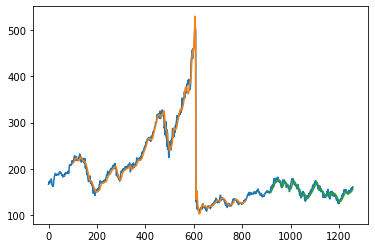

In [22]:
### Plotting 
import matplotlib.pyplot as plt
# shift train predictions for plotting
look_back=100
trainPredictPlot = np.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df1)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df1))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()